In [1]:
from PredFunctions import *

s - КНЦ  
m - Министерство

In [8]:
sensor = 's'

# Данные за 3+ года КНЦ
dfAll = pd.read_csv(f"pm25_{sensor}.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'])
dfAll['Mean'] = dfAll[['Николаевка', 'Овинный-Таймыр', 'Песчанка', 'Телевизорная, 1/31', 'Ветлужанка']].mean(axis=1)
dfAll

,Академгородок,Дрокино,Кировский,КрАЗ,"Ленина, 41",Минино,о. Молокова,Николаевка,Овинный-Таймыр,"Партизана, 3г",...,"Шахтеров, 25",Солонцы,Спутник,Светлый,Свердловский,о. Татышев,"Телевизорная, 1/31",Удачный,Ветлужанка,Mean
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,5.09,252.51,NaN,NaN,234.87,197.01,NaN,281.51,212.19,NaN,...,NaN,NaN,NaN,89.31,NaN,NaN,NaN,7.89,276.29,220.8950
2019-01-02,4.49,148.05,NaN,NaN,69.94,83.78,NaN,139.63,81.81,NaN,...,NaN,NaN,NaN,46.61,NaN,NaN,NaN,10.69,128.53,103.4725
2019-01-03,3.85,97.78,NaN,NaN,6.82,53.16,NaN,30.27,12.28,NaN,...,NaN,NaN,NaN,16.58,NaN,NaN,NaN,7.12,12.32,20.8300
2019-01-04,8.80,145.74,NaN,NaN,118.58,121.09,NaN,160.94,118.75,NaN,...,NaN,NaN,NaN,76.18,NaN,NaN,NaN,14.14,190.32,133.9000
2019-01-05,7.83,144.27,NaN,NaN,129.13,115.09,NaN,135.39,119.38,NaN,...,NaN,NaN,NaN,100.02,NaN,NaN,NaN,11.13,129.95,119.5750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-02,3.60,NaN,8.37,19.24,5.20,25.83,7.50,23.99,NaN,7.64,...,17.22,47.65,5.15,NaN,6.03,4.52,30.00,5.11,25.70,24.0025
2023-04-03,1.68,NaN,1.79,3.14,2.86,12.34,1.93,7.96,NaN,2.83,...,5.34,3.65,2.45,NaN,2.34,1.95,2.07,2.32,1.34,4.1950
2023-04-04,2.07,NaN,1.92,4.96,4.00,8.99,2.78,8.12,NaN,4.53,...,5.33,12.40,3.06,NaN,3.12,2.83,3.28,2.54,2.48,4.6525


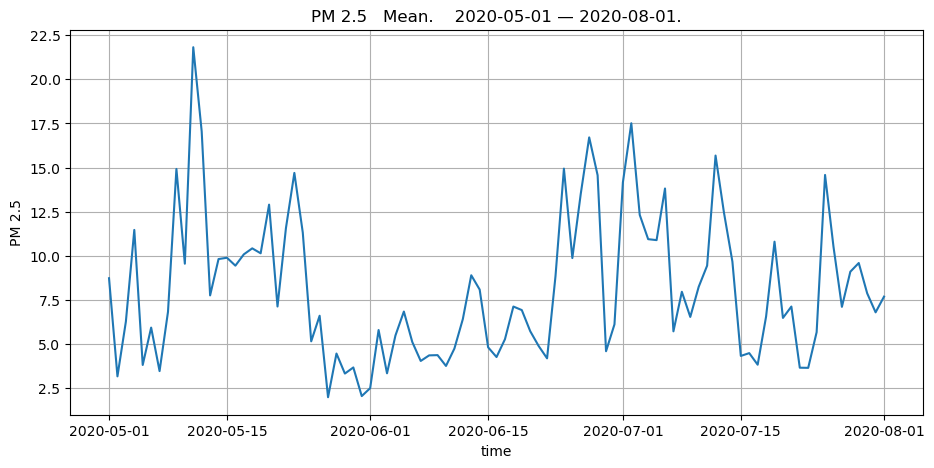

In [10]:
district = 'Mean'
df = dfAll[district]

# Срез данных от begin до end
begin, end = "2020-05-01", "2020-08-01"

# Начало прогнозирования
start = "2020-07-26"

PlotSerie(df[begin : end], f'PM 2.5   {district}.    {begin} — {end}.')

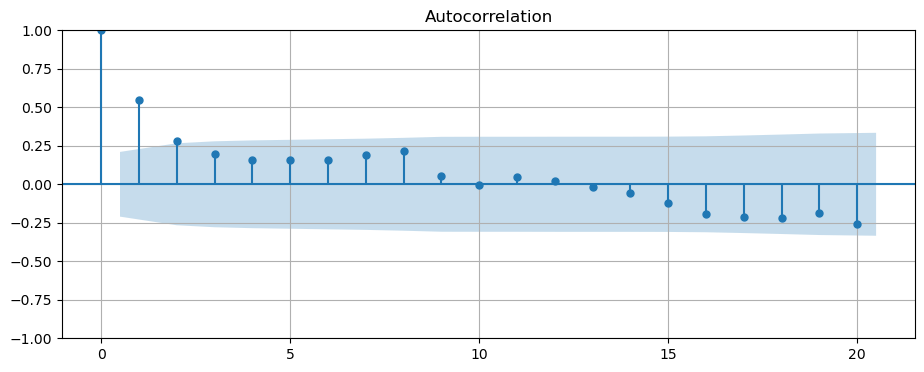

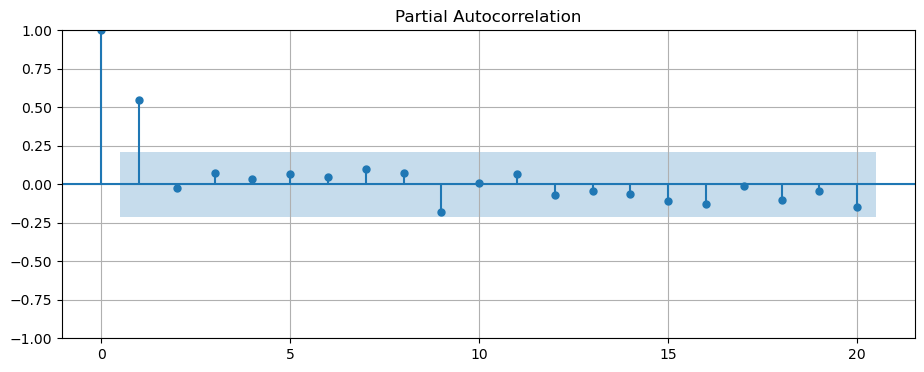

In [25]:
forecast = Forecaster(sensor, district, begin, start, end, exog_features = ['Wet','Pressure'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,coef,std err,z,P>|z|,[0.025,0.975]
x1,-0.0337,0.050,-0.680,0.496,-0.131,0.063
x2,0.0138,0.004,3.126,0.002,0.005,0.022
ar.L1,1.0203,0.765,1.334,0.182,-0.478,2.519
ar.L2,-0.1393,0.510,-0.273,0.785,-1.138,0.860
ma.L1,-0.4905,0.745,-0.659,0.510,-1.950,0.969
ma.L2,-0.1864,0.200,-0.933,0.351,-0.578,0.205
sigma2,11.9315,1.832,6.514,0.000,8.342,15.521


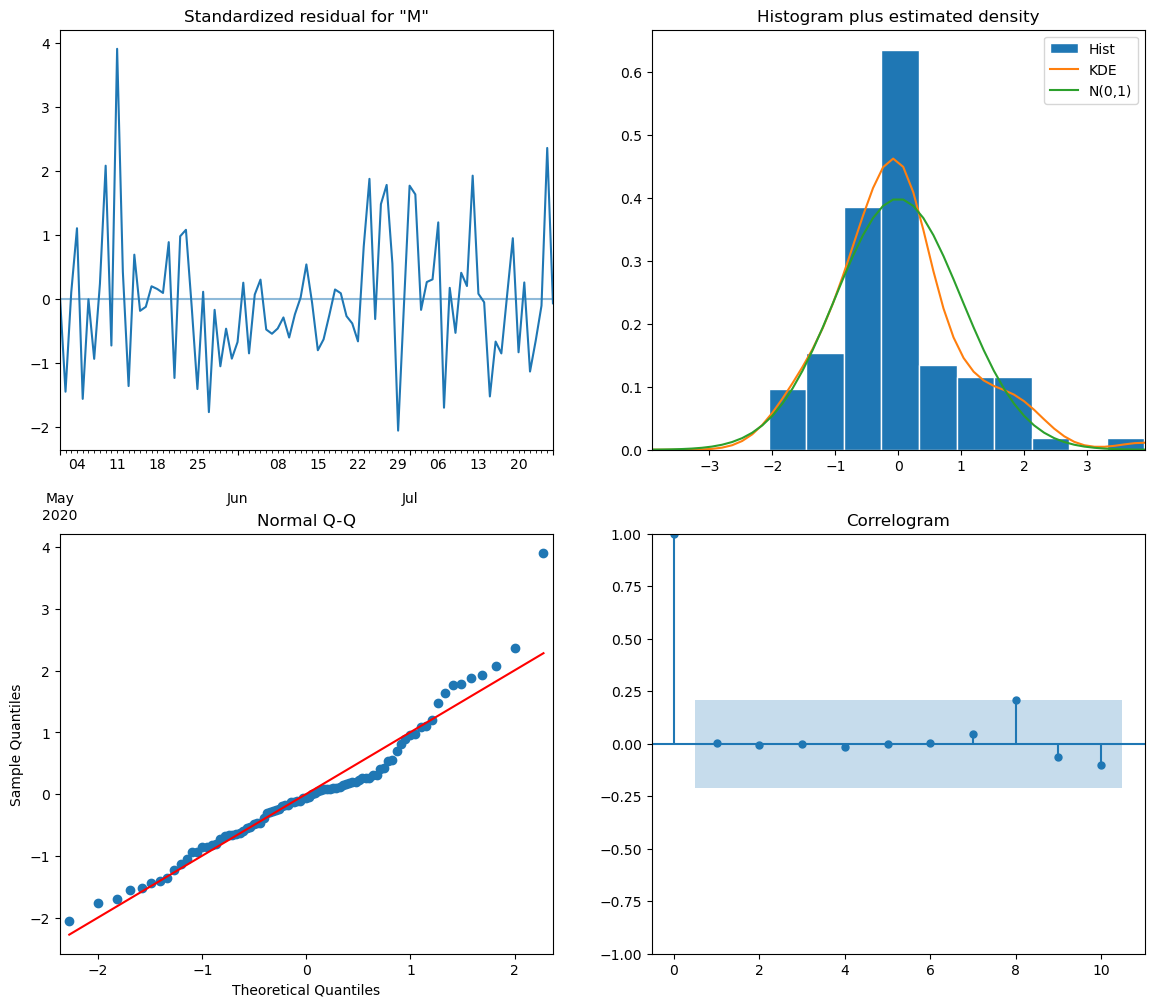

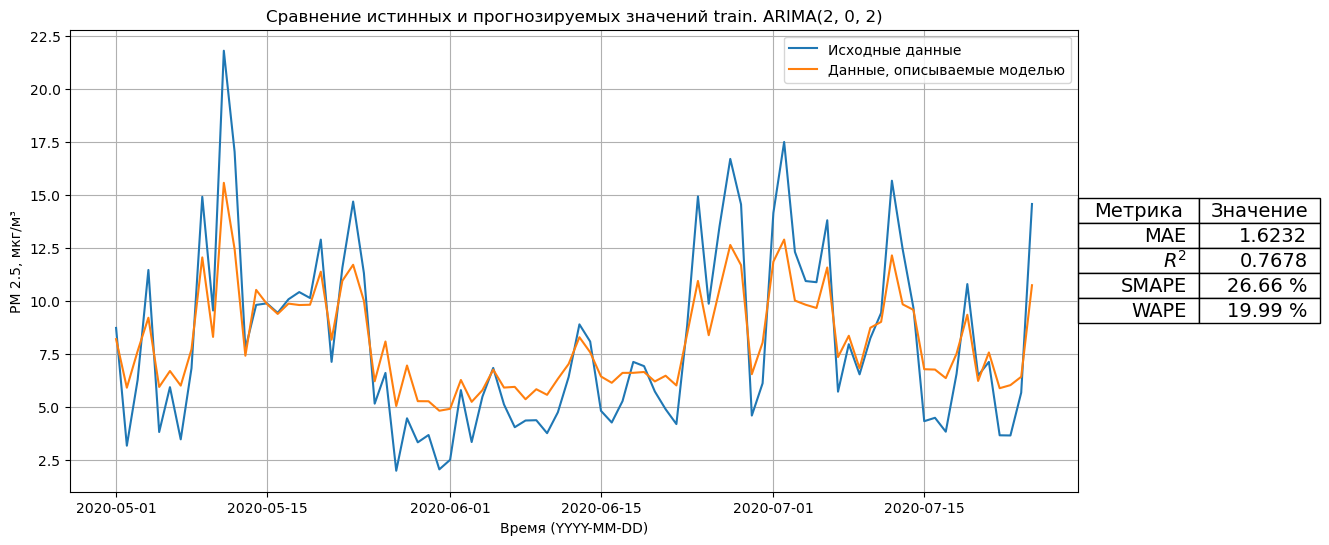

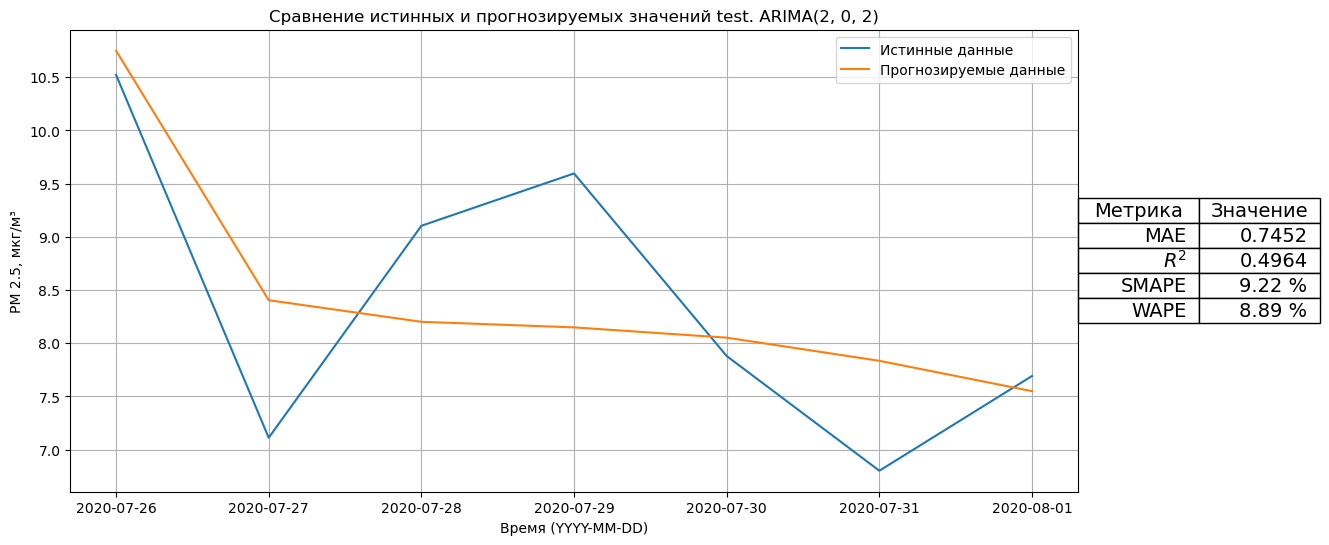

In [26]:
forecast.getModel(p = 2, d = 0, q = 2, use_optimal = False, save = True)